## Import used libraries:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

## Import the two Google SV time series

In [19]:
google_queries_USA = pd.DataFrame.from_csv("Google Trends Relative Search Volume.csv")
google_queries_worldwide = pd.DataFrame.from_csv("Google Trends Relative Search Volume Worldwide.csv")

## Join the two dataframes

In [20]:
google_queries_USA = google_queries_USA.rename(columns={"Week" : "Date"})

In [21]:
google_queries_comparison = pd.concat([google_queries_USA, google_queries_worldwide], axis=1)
google_queries_comparison = google_queries_comparison.drop(["Week"],axis=1)
google_queries_comparison.head()

,Date,Relative Search Volume,Relative Search Volume Worldwide
0,2013-04-14,6,6
1,2013-04-21,3,3
2,2013-04-28,3,3
3,2013-05-05,2,3
4,2013-05-12,3,2


## Create Chart to illustrate development of Retail Investor Attention and Bitcoin Prices

In [22]:
google_queries_comparison['Date'] = google_queries_comparison['Date'].astype('datetime64[D]')

In [23]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, linewidth=1.0, color=c1)
    ax1.set_xlabel('Time (Months)')
    ax1.set_ylabel('Google SV USA in %', color="red" )

    ax2.plot(time, data2, linewidth=1.0, color=c2)
    ax2.set_ylabel('Google SV Worldwide in %', color="blue")
    return ax1, ax2


def color_y_axis(ax, color):
    
    for x in ax.get_yticklabels():
        x.set_color(color)
    return None

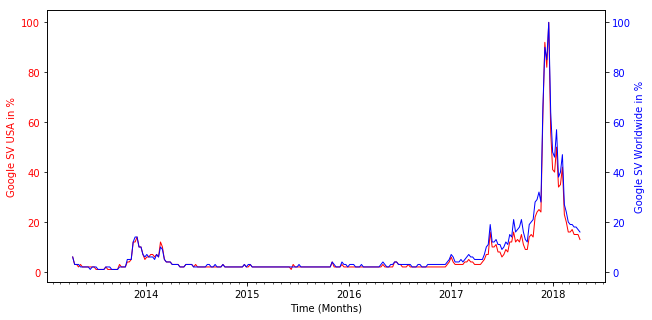

In [24]:
x = google_queries_comparison['Date']
y1 = google_queries_comparison['Relative Search Volume']
y2 = google_queries_comparison['Relative Search Volume Worldwide']


fig, ax = plt.subplots(figsize=(10,5))

ax1, ax2 = two_scales(ax, x, y1, y2, 'r', 'b')

color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')

years = mdates.YearLocator()   
months = mdates.MonthLocator() 
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.show()

## Correlation Analysis

In [30]:
stats.pearsonr(google_queries_comparison["Relative Search Volume"], google_queries_comparison["Relative Search Volume Worldwide"])

(0.99366807213705943, 6.3322720899517128e-248)